In [1]:
import pandas as pd
import pylab as plt
import numpy as np

**Aşağıda bağlantısı bulunan csv dosyasını pandas frame olarak açın?**

In [34]:
data="https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
df = pd.read_csv(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Bu dosya içerisindeki tüm genel bilgileri (sütun tipleri) gösterin?**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Bu dosya içerisindeki tüm istatistiksel bilgileri gösterin?**

In [36]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Veri setinde bulunan her sutundaki benzersiz verilerin sayisini goruntuleyiniz**

### Bunlar cevaplayacağımız soru kategorileri:
* Hangi yolcu sınıfında hayatta kalanlar maksimum sayıya sahip
* Farklı sınıflar arasında hayatta kalanların cinsiyete göre dağılımı
* Gemideki kurtulamayan ve dışarda akrabaları olan kişilerin sınıflar arasında dağılımı
* Farklı yaş grupları arasında hayatta kalma yüzdesi

In [39]:
# Age,Fare ve embarked için eksik olan verileri inceleyin 
df[df.Age.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [40]:
# Age değeri eksik olmayan verileri seçmek için
df_temp=df[df.Age.notnull()]

In [41]:
#Age ve Fare  eksik olan verileri  "ortanca sütun değerleri" ile doldurun Embarked  için ise "S" ile doldurun
df["Age"]=df.Age.fillna(df.Age.median())
#df[...]=df.Fare...(...)
#df[...]=df.Embarked...(...)

In [42]:
#cinsiyet dağılımı için
df_temp.Sex.value_counts()

male      453
female    261
Name: Sex, dtype: int64

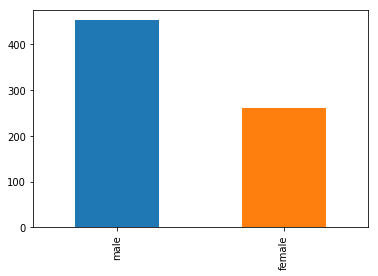

In [43]:
# Bütün yolcuların kadın/erkek dağılımı barchart olarak görmek için 
df_temp.Sex.value_counts().plot(kind="bar")

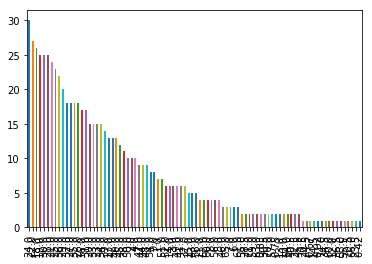

In [44]:
# Bütün yolcuların yaş değerini barchart olarak görmek için
df_temp.Age.value_counts().plot(kind="bar")

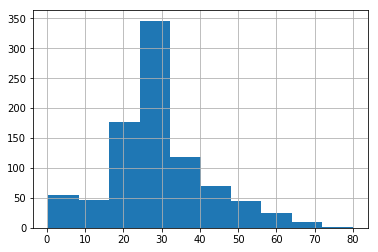

In [47]:
# Age gibi büyük bir aralıkta değer olan değişkenler için histogram grafiği daha anlamlı olup bunu çizmek için
df.Age.hist(bins=10)

## Hangi yolcu sınıfı hayatta kalanların maksimum sayısına sahip?

In [48]:
# Yolculardan kurtulanları seçmek için
df[df.Survived==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.00,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.00,0,0,2649,7.2250,NaN,C


In [49]:
# Bütün  kurtulanların bilet sınıflarına göre sayılarını görmek için
df[df.Survived==1].groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,136,136,136,136,136,136,136,136,136,117,134
2,87,87,87,87,87,87,87,87,87,13,87
3,119,119,119,119,119,119,119,119,119,6,119


In [51]:
# kurtulan yolcuların  bilet sınıflarına göre sayılarını görmek için
df[df.Survived==1].groupby("Pclass").Survived.value_counts()

Pclass  Survived
1       1           136
2       1            87
3       1           119
Name: Survived, dtype: int64

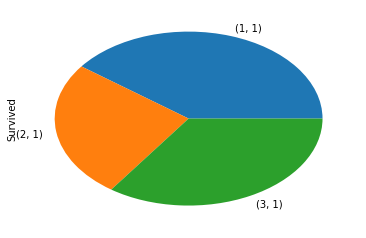

In [53]:
# yolcuların kurtulanların bilet sınıflarına göre sayılarını dağılımını çizmek için (1. sorunun cevabı)
df[df.Survived==1].groupby("Pclass").Survived.value_counts().plot(kind="pie")

In [54]:
# Kurtulan yolcuların bilet sınıflarına göre ödedikleri üçretlerin ortalaması için 
df[df.Survived==1].groupby("Pclass").Fare.mean()

Pclass
1    95.608029
2    22.055700
3    13.694887
Name: Fare, dtype: float64

In [55]:
# Bütün yolcuların bilet sınıflarına göre ödedikleri üçretlerin ortalaması için
df.groupby("Pclass").mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,36.812130,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.765380,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.932627,0.615071,0.393075,13.675550


In [85]:
# Hayata kalan yolcuların bilet sınıflarına göre cinsiyet sayılarını görmek için
df[df.Survived==1].groupby("Pclass").Sex.count()

Pclass
1    136
2     87
3    119
Name: Sex, dtype: int64

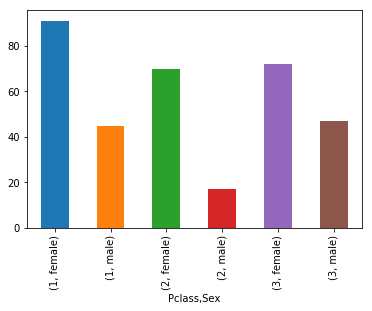

In [58]:
# Hayata kalan yolcuların bilet sınıflarına göre cinsiyet dağılımlarını barchart olarak çizmek için (2. sorunu cevabı)
df[df.Survived==1].groupby("Pclass").Sex.value_counts().plot(kind="bar")

## Farklı sınıflar arasında hayatta kalanların cinsiyete göre dağılımı nedir?

In [61]:
# Gemideki kurtulamayan ve dışarda akrabaları olan kişileri seçmek için
df[(df.Survived==0) & ((df.SibSp>0) | (df.Parch>0))].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S


In [64]:
# Gemideki kurtulamayan ve dışarda akrabaları olan kişilerin sınıflar arasındaki dağılımı için
non_survivors =df[(df.Survived==0) & ((df.SibSp>0) | (df.Parch>0))].groupby("Pclass").Survived.count()
non_survivors

Pclass
1     29
2     29
3    117
Name: Survived, dtype: int64

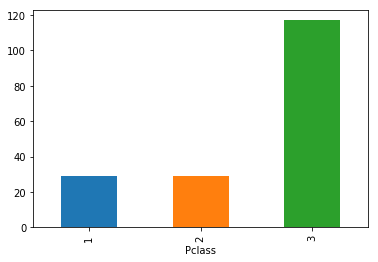

In [66]:
# Gemideki kurtulamayan ve dışarda akrabaları olan kişilerin sınıflar arasındaki dağılımını çizmek için (3. soru)
non_survivors.plot(kind="bar")

In [67]:
# Sınfa göre hayatta kalamayanların toplam sayısı
total_survivor = df[(df.Survived==0)].groupby("Pclass").PassengerId.count()

In [69]:
total_survivor

Pclass
1     80
2     97
3    372
Name: PassengerId, dtype: int64

In [70]:
# # Gemideki kurtulamayan ve dışarda akrabaları olan kişilerin sınıflar arasındaki oransal dağılımı için 
percentange = non_survivors/total_survivor
percentange

Pclass
1    0.362500
2    0.298969
3    0.314516
dtype: float64

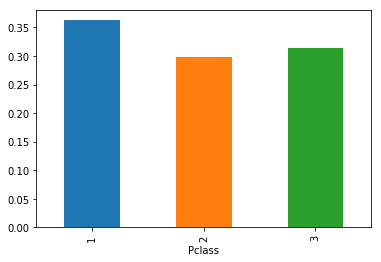

In [71]:
# # Gemideki kurtulamayan ve dışarda akrabaları olan kişilerin sınıflar arasındaki oransal dağılımı çizmek için 
percentange.plot(kind="bar")

## Farklı yaş grupları arasında hayatta kalma yüzdesi nedir?

In [73]:
# yaş aralıklarını tanımlamak için
age_bin = [0,18,25,40,60,100]

In [74]:
# yaş aralıklarını bir seri olarak olşturur
pd.cut(df.Age,bins=age_bin).head()

0    (18, 25]
1    (25, 40]
2    (25, 40]
3    (25, 40]
4    (25, 40]
Name: Age, dtype: category
Categories (5, interval[int64]): [(0, 18] < (18, 25] < (25, 40] < (40, 60] < (60, 100]]

In [77]:
# bu yaş aralık serisini yeni bir sütun olarak ekler
df["Agebin"]=pd.cut(df.Age,bins=age_bin)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(25, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25, 40]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(25, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(25, 40]"


In [79]:
# null verileri çıkarmak için
df_temp=df[df.notnull()]
df_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(25, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25, 40]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(25, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(25, 40]"


In [81]:
# Hayata kalan kişilerin yaş aralıklarına göre sayısını bulmak için
df_temp[df.Survived==1].groupby("Agebin").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Agebin,,,,,,,,,,,,
"(0, 18]",70,70,70,70,70,70,70,70,70,70,20,70
"(18, 25]",54,54,54,54,54,54,54,54,54,54,21,54
"(25, 40]",163,163,163,163,163,163,163,163,163,163,61,162
"(40, 60]",50,50,50,50,50,50,50,50,50,50,31,50
"(60, 100]",5,5,5,5,5,5,5,5,5,5,3,4


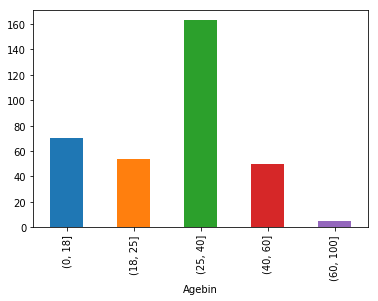

In [84]:
# Hayata kalan kişilerin yaş aralıklarına göre sayısını pie chart olarak çizmek için (4. sorunun cevabı)
df_temp[df.Survived==1].groupby("Agebin").PassengerId.count().plot(kind="bar")